In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set some display options for better viewing
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

print("Libraries imported successfully!")

Libraries imported successfully!


In [8]:
# Paste the full file path you copied inside the quotes.
# Use an 'r' before the string if you are on Windows.

# Example for Windows:
# file_path = r'C:\Users\YourName\Downloads\data.csv'

# Example for macOS:
# file_path = '/Users/YourName/Downloads/data.csv'

file_path = r'D:/data analyst project 1/data.csv'

# Now, run the code to load the data
df = pd.read_csv(file_path, encoding='latin1')

print("Dataset loaded successfully from your specified folder!")
df.head()

Dataset loaded successfully from your specified folder!


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [10]:
# First, let's be absolutely sure the rows with missing CustomerID are gone.
df.dropna(subset=['CustomerID'], inplace=True)

# Now, convert the CustomerID to an integer, then immediately to a string.
# This correctly removes the decimal (e.g., 12345.0 -> 12345) before making it a string.
df['CustomerID'] = df['CustomerID'].astype(int).astype(str)

# Let's check the data types now with df.info()
print("Updated data types:")
df.info()

Updated data types:
<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [13]:
# Create the TotalPrice column by multiplying Quantity and UnitPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

print("TotalPrice column has been created successfully!")
df.head()

TotalPrice column has been created successfully!


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,20.34


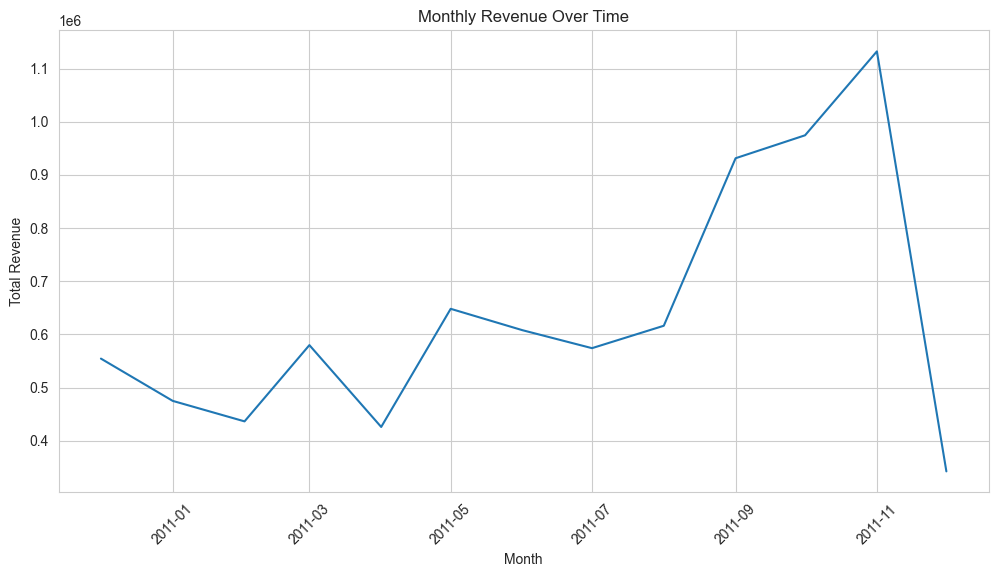

In [14]:
# Create a 'Month' column from the 'InvoiceDate'
# We use '.to_period('M')' to group dates by month and year
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

# Group by month and calculate the sum of 'TotalPrice'
monthly_revenue = df.groupby('InvoiceMonth')['TotalPrice'].sum().reset_index()

# Convert 'InvoiceMonth' back to a plottable format
monthly_revenue['InvoiceMonth'] = monthly_revenue['InvoiceMonth'].dt.to_timestamp()

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(x='InvoiceMonth', y='TotalPrice', data=monthly_revenue)
plt.title('Monthly Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

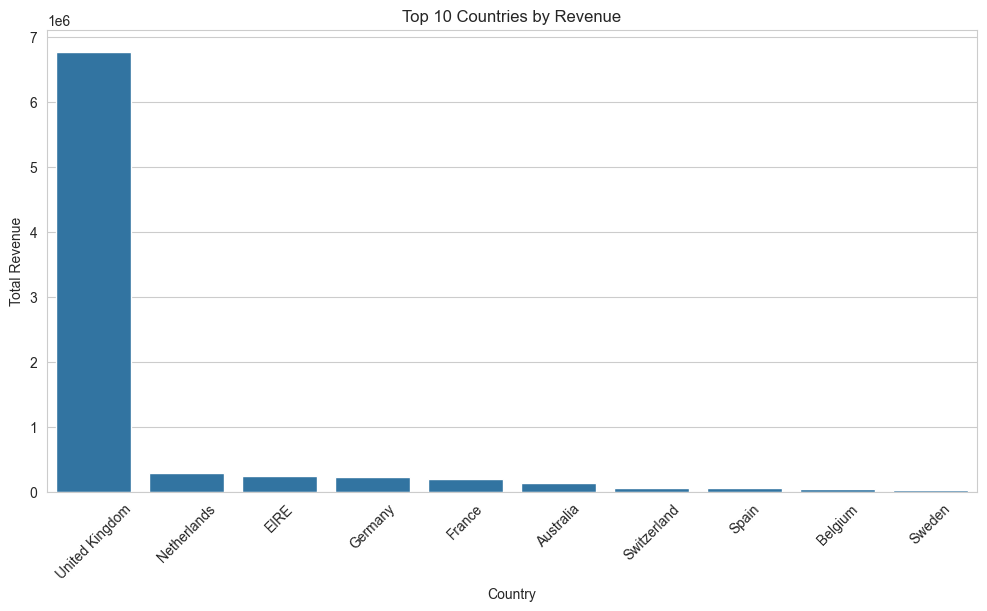

Country
United Kingdom    6767873.394
Netherlands        284661.540
EIRE               250285.220
Germany            221698.210
France             196712.840
Australia          137077.270
Switzerland         55739.400
Spain               54774.580
Belgium             40910.960
Sweden              36595.910
Name: TotalPrice, dtype: float64


In [15]:
# Group by country and sum the total price
country_revenue = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

# Get the top 10 countries
top_10_countries = country_revenue.head(10)

# Plot the top 10 countries
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values)
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

print(top_10_countries)

In [16]:
# Create a copy to avoid modifying the original cleaned dataframe
df_promo = df.copy()

# Define a function to assign promotion type based on date
def assign_promotion(date):
    if date.month == 3:
        return 'Control'
    elif date.month == 4:
        return '10% Off'
    elif date.month == 5:
        return 'B2G1'
    else:
        return 'Other'

# Apply this function to create the 'PromotionType' column
# We only use data from 2011 for this analysis
df_promo = df_promo[df_promo['InvoiceDate'].dt.year == 2011]
df_promo['PromotionType'] = df_promo['InvoiceDate'].apply(assign_promotion)

# Filter out the 'Other' months to focus only on our experiment periods
df_experiment = df_promo[df_promo['PromotionType'] != 'Other']

print("Promotion periods assigned successfully!")
print(df_experiment['PromotionType'].value_counts())

Promotion periods assigned successfully!
PromotionType
B2G1       28908
Control    27822
10% Off    23198
Name: count, dtype: int64


--- Promotion Performance Summary ---
               TotalRevenue  TotalOrders         AOV
PromotionType                                       
10% Off          426047.851         1384  307.838043
B2G1             648251.080         1849  350.595500
Control          579964.610         1619  358.223972


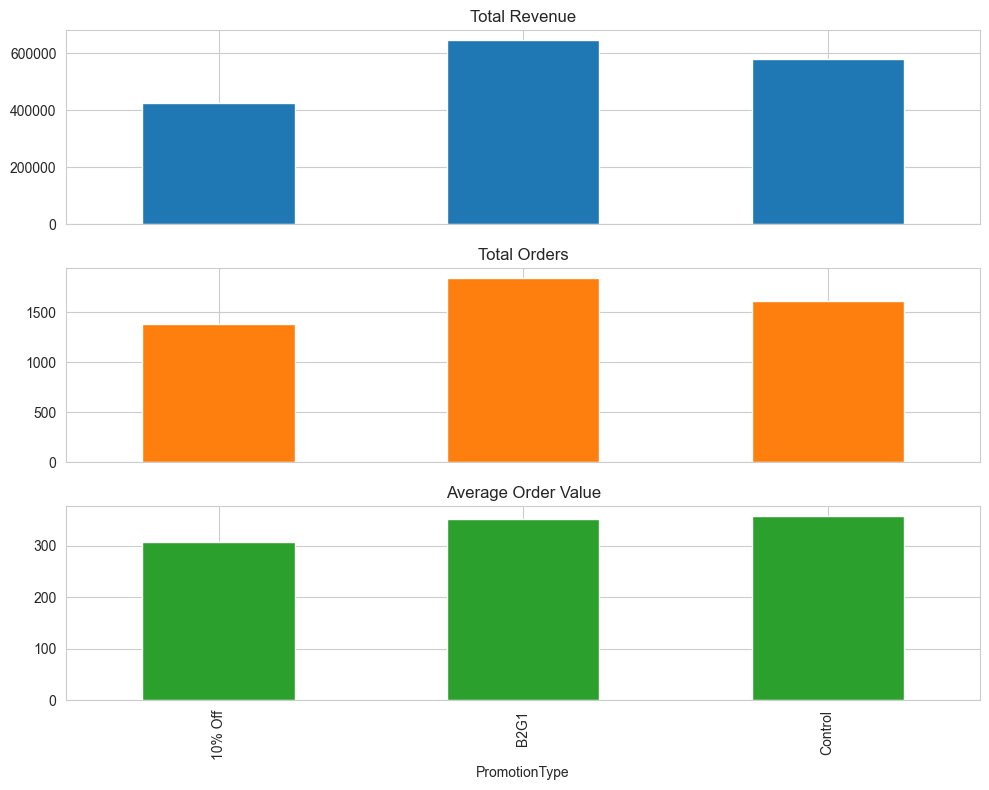

In [17]:
# Group by promotion type and calculate metrics
promo_summary = df_experiment.groupby('PromotionType').agg(
    TotalRevenue=('TotalPrice', 'sum'),
    TotalOrders=('InvoiceNo', 'nunique')
)

# Calculate Average Order Value (AOV)
promo_summary['AOV'] = promo_summary['TotalRevenue'] / promo_summary['TotalOrders']

# To make the B2G1 promotion comparable, we need to estimate its cost.
# Let's assume the free item is the cheapest one in any order with 3+ items.
# For simplicity in this step, we will calculate ROI later.
# For now, we are looking at top-line revenue.

print("--- Promotion Performance Summary ---")
print(promo_summary)

# Plot the results
promo_summary.plot(kind='bar', subplots=True, figsize=(10, 8), legend=False,
                   title=['Total Revenue', 'Total Orders', 'Average Order Value'])
plt.tight_layout()
plt.show()

In [18]:
from scipy.stats import ttest_ind

# Get the order values for the 'Control' period
control_orders = df_experiment[df_experiment['PromotionType'] == 'Control'].groupby('InvoiceNo')['TotalPrice'].sum()

# Get the order values for the '10% Off' period
promo_10_off_orders = df_experiment[df_experiment['PromotionType'] == '10% Off'].groupby('InvoiceNo')['TotalPrice'].sum()

# Perform the independent t-test
t_stat, p_value = ttest_ind(control_orders, promo_10_off_orders)

print(f"--- T-Test for Average Order Value (10% Off vs. Control) ---")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
if p_value < 0.05:
    print("\nConclusion: The difference is statistically significant. We reject the null hypothesis.")
else:
    print("\nConclusion: The difference is not statistically significant. We fail to reject the null hypothesis.")

--- T-Test for Average Order Value (10% Off vs. Control) ---
T-statistic: 1.54
P-value: 0.1245

Conclusion: The difference is not statistically significant. We fail to reject the null hypothesis.


In [19]:
# --- 1. Calculate Baseline Revenue ---
# We use the control period (March, 31 days) to set our baseline
baseline_revenue = promo_summary.loc['Control', 'TotalRevenue']
baseline_daily_revenue = baseline_revenue / 31

# --- 2. Calculate ROI for "10% Off" Promotion ---
# This promotion ran in April (30 days)
promo_10_off_revenue = promo_summary.loc['10% Off', 'TotalRevenue']
expected_revenue_10_off = baseline_daily_revenue * 30
incremental_revenue_10_off = promo_10_off_revenue - expected_revenue_10_off

# Cost is the total discount given
cost_10_off = promo_10_off_revenue * 0.10
roi_10_off = (incremental_revenue_10_off - cost_10_off) / cost_10_off

# --- 3. Calculate ROI for "B2G1" Promotion ---
# This promotion ran in May (31 days)
promo_b2g1_revenue = promo_summary.loc['B2G1', 'TotalRevenue']
expected_revenue_b2g1 = baseline_daily_revenue * 31
incremental_revenue_b2g1 = promo_b2g1_revenue - expected_revenue_b2g1

# We assume for every 3 items, one (the average priced one) is free
avg_unit_price = df_experiment['UnitPrice'].mean()
total_quantity_b2g1 = df_experiment[df_experiment['PromotionType'] == 'B2G1']['Quantity'].sum()
cost_b2g1 = (total_quantity_b2g1 / 3) * avg_unit_price
roi_b2g1 = (incremental_revenue_b2g1 - cost_b2g1) / cost_b2g1

# --- 4. Print Results ---
print("\n--- ROI Calculation Results ---")
print(f"10% Off Promotion ROI: {roi_10_off:.2%}")
print(f"B2G1 Promotion ROI:    {roi_b2g1:.2%}")


--- ROI Calculation Results ---
10% Off Promotion ROI: -417.35%
B2G1 Promotion ROI:    -85.77%


In [22]:
# --- Recalculate the necessary figures ---

# 1. Calculate the average price of a single item
avg_unit_price = df_experiment['UnitPrice'].mean()

# 2. Find the total number of individual items sold during the B2G1 promo
total_quantity_b2g1 = df_experiment[df_experiment['PromotionType'] == 'B2G1']['Quantity'].sum()

# 3. Calculate the final cost
cost_b2g1 = (total_quantity_b2g1 / 3) * avg_unit_price

# --- Print the full calculation ---
print("--- B2G1 Cost Calculation ---")
print(f"Total Items Sold (Quantity): {total_quantity_b2g1:,.0f}")
print(f"Average Price per Item: ${avg_unit_price:,.2f}")
print("-" * 30)
print(f"Formula: (Total Items Sold / 3) * Average Price per Item")
print(f"Calculation: ({total_quantity_b2g1:,.0f} / 3) * ${avg_unit_price:,.2f} = ${cost_b2g1:,.2f}")

--- B2G1 Cost Calculation ---
Total Items Sold (Quantity): 367,852
Average Price per Item: $3.91
------------------------------
Formula: (Total Items Sold / 3) * Average Price per Item
Calculation: (367,852 / 3) * $3.91 = $479,924.90


In [23]:
import pandas as pd

# --- Consolidate all metrics into one DataFrame ---
# Start with the summary we already have
dashboard_df = promo_summary.copy()

# Manually add the calculated costs and ROI
costs = {
    '10% Off': cost_10_off,
    'B2G1': cost_b2g1,
    'Control': 0  # Control group has no cost
}
rois = {
    '10% Off': roi_10_off,
    'B2G1': roi_b2g1,
    'Control': 0 # Control group has no ROI
}
incremental_rev = {
    '10% Off': incremental_revenue_10_off,
    'B2G1': incremental_revenue_b2g1,
    'Control': 0 # Control is the baseline
}


dashboard_df['Cost'] = dashboard_df.index.map(costs)
dashboard_df['ROI'] = dashboard_df.index.map(rois)
dashboard_df['IncrementalRevenue'] = dashboard_df.index.map(incremental_rev)

print("--- Final DataFrame for Dashboard ---")
print(dashboard_df)

# Export this data to a CSV to use in Tableau or Power BI
dashboard_df.to_csv('dashboard_data.csv')

--- Final DataFrame for Dashboard ---
               TotalRevenue  TotalOrders         AOV           Cost       ROI  \
PromotionType                                                                   
10% Off          426047.851         1384  307.838043   42604.785100 -4.173545   
B2G1             648251.080         1849  350.595500  479924.900794 -0.857714   
Control          579964.610         1619  358.223972       0.000000  0.000000   

               IncrementalRevenue  
PromotionType                      
10% Off            -135208.223194  
B2G1                 68286.470000  
Control                  0.000000  


C:\Users\srira\AppData\Local\Temp\ipykernel_12652\3664807373.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=plot_data.index, y=plot_data['ROI'], palette=['#d9534f', '#f0ad4e']) # Using red and orange for negative ROI


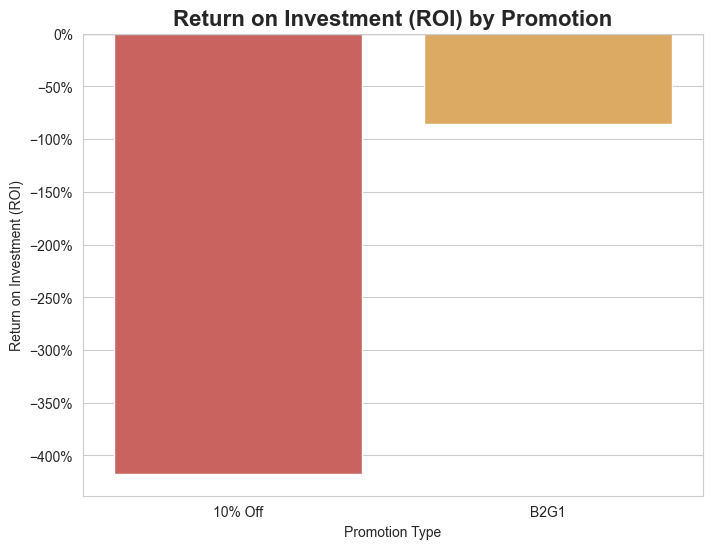

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Filter for promotions only
plot_data = dashboard_df[dashboard_df.index != 'Control']

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=plot_data.index, y=plot_data['ROI'], palette=['#d9534f', '#f0ad4e']) # Using red and orange for negative ROI
ax.yaxis.set_major_formatter(PercentFormatter(1.0)) # Format y-axis as percentage

plt.title('Return on Investment (ROI) by Promotion', fontsize=16, fontweight='bold')
plt.ylabel('Return on Investment (ROI)')
plt.xlabel('Promotion Type')
plt.axhline(0, color='black', linewidth=0.8) # Add a line at 0% for reference
plt.show()

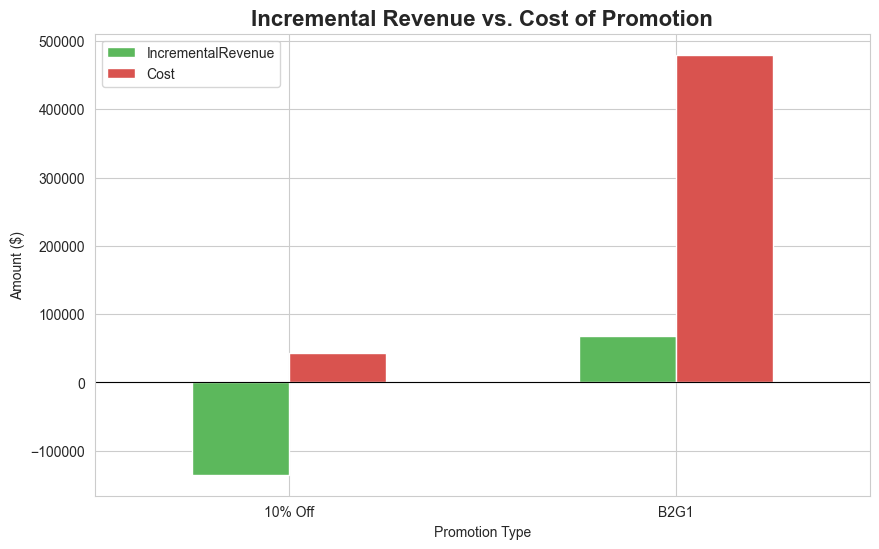

In [25]:
# Prepare data for plotting (remove Control group)
plot_data = dashboard_df[dashboard_df.index != 'Control'][['IncrementalRevenue', 'Cost']]

plot_data.plot(kind='bar', figsize=(10, 6), color=['#5cb85c', '#d9534f']) # Green for revenue, Red for cost
plt.title('Incremental Revenue vs. Cost of Promotion', fontsize=16, fontweight='bold')
plt.ylabel('Amount ($)')
plt.xlabel('Promotion Type')
plt.xticks(rotation=0)
plt.axhline(0, color='black', linewidth=0.8)
plt.show()